In [1]:
import os
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ROOT_DIR = "/usr/local/google/home/ttrippel/Repos/hw-fuzzing/circuits/double_counter/data"
BYTE_STREAM_DIR = os.path.join(ROOT_DIR, "exp002_aflgo_byte_stream")
ONE_BPL_DIR = os.path.join(ROOT_DIR, "exp003_aflgo_1byte_per_line")
ONE_BPL_WCHECK_DIR = os.path.join(ROOT_DIR, "exp004_aflgo_1byte_per_line_wformatcheck")

In [3]:
# Load performance/coverage data into data frames for plotting
plot_titles = []
stats_dfs = []

# experiment parameters
input_formats = [BYTE_STREAM_DIR, ONE_BPL_DIR, ONE_BPL_WCHECK_DIR]
fuzz_times = [(10, 7), (60, 45), (120, 10)]
fuzzer_modes = ["m", "s"]

for time in fuzz_times:
  for mode in fuzzer_modes:
    for format in input_formats:

      # Set plot titles
      if format == BYTE_STREAM_DIR:
        format_title = "Byte Stream"
      elif format == ONE_BPL_DIR:
        format_title = "1-BPL"
      else:
        format_title = "1-BPL-wCheck"
      plot_titles.append("%s; TTF: %dm; TTE: %dm; Mode: %s" % (format_title, time[0], time[1], mode))

      # Load data into data frames
      stats_path = os.path.join(format, "out/aflgo_%dm_%dttem_%s_1/plot_data" % (time[0], time[1], mode))
      stats_df = pd.read_csv(stats_path)
      stats_df["# unix_time"] = stats_df["# unix_time"].sub(stats_df["# unix_time"][0])
      stats_df.rename(columns={ \
          "# unix_time" : "Time (seconds)", \
          " cycles_done" : "Cycles Done", \
          " cur_path" : "Current Path", \
          " paths_total" : "Paths Total", \
          " pending_total" : "Pending Total", \
          " pending_favs" : "Pending Favorites", \
          " map_size" : "Map Size", \
          " unique_crashes" : "Unique Crashes", \
          " unique_hangs" : "Unique Hangs", \
          " max_depth" : "Max Depth", \
          " execs_per_sec" : "Execs/Second"}, inplace=True)
      stats_dfs.append(stats_df)

Saving plot to: /usr/local/google/home/ttrippel/Repos/hw-fuzzing/plots/exp004_double_counter_performance.pdf


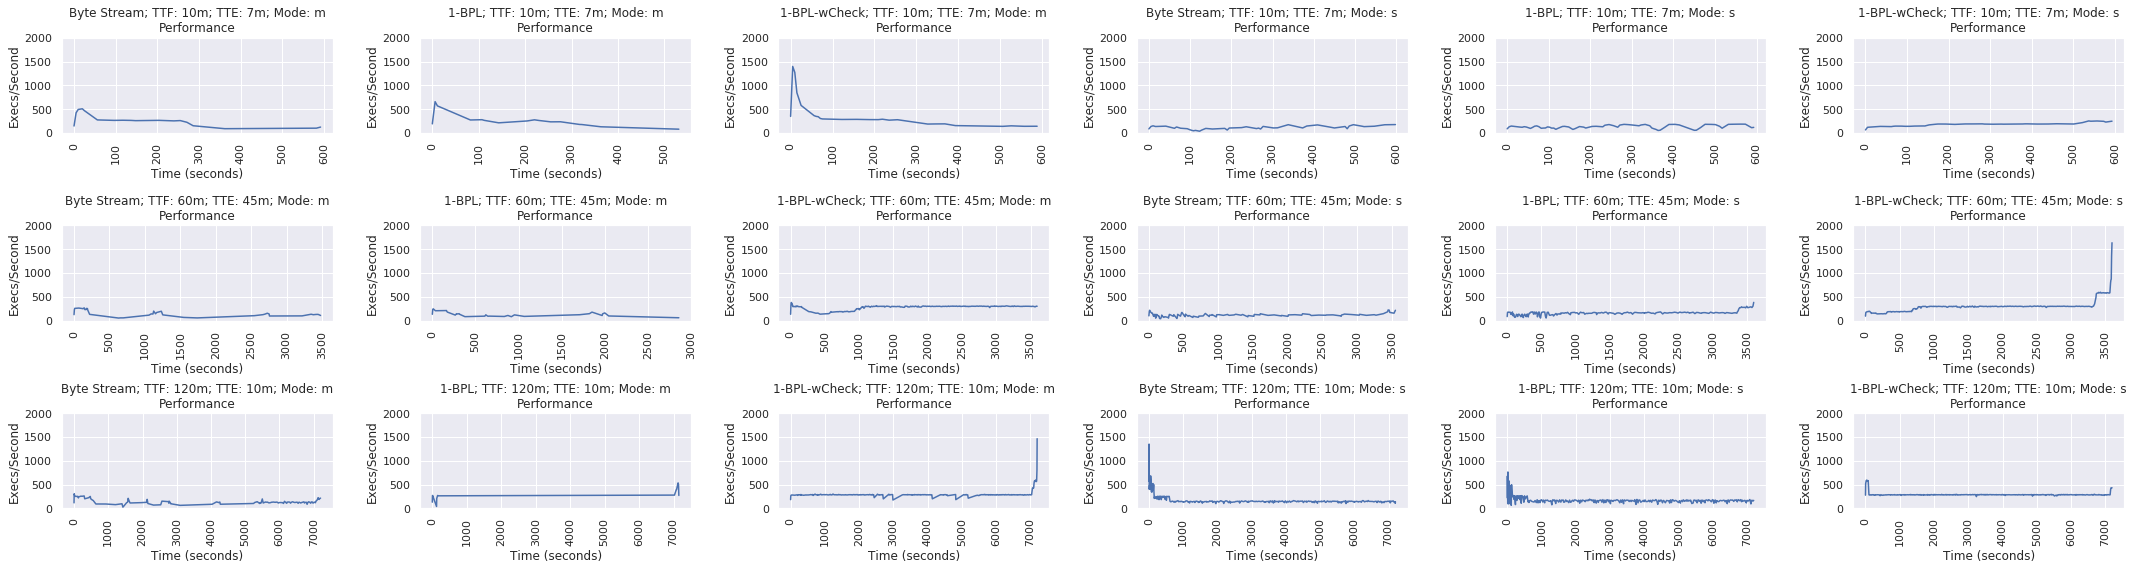

In [8]:
# Plot performance data
NUM_ROWS = 3
NUM_COLS = 6
sns.set()
fig, axes = plt.subplots(NUM_ROWS, NUM_COLS, figsize=(30, 8));

# Plot register counts
for row in range(NUM_ROWS):
  for col in range(NUM_COLS):
    df_ind = (row * NUM_COLS) + (col % NUM_COLS)    
    sns.lineplot(x=stats_dfs[df_ind]["Time (seconds)"], y=stats_dfs[df_ind]["Execs/Second"], ax=axes[row][col], estimator=None)
    axes[row][col].set_ylim([0, 2000])
    plt.setp(axes[row][col].xaxis.get_majorticklabels(), rotation=90)
    axes[row][col].set_title(plot_titles[df_ind] + "\nPerformance")

# Adjust layout of subplots to fit
plt.tight_layout();

# Save Plot as a PDF
plot_filename = "/usr/local/google/home/ttrippel/Repos/hw-fuzzing/plots/exp004_double_counter_performance.pdf"
print("Saving plot to:", plot_filename)
plt.savefig(plot_filename, format='pdf')